In [9]:
from matplotlib import pyplot as plt
from collections import Counter

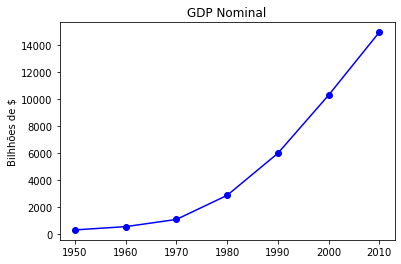

In [4]:
years = [1950,1960,1970,1980,1990,2000,2010]
gdp = [300.2,543.3,1075.9,2862.5,5979.6,10289,14958.3]
plt.plot(years,gdp,color="blue",marker="o",linestyle = "solid")
plt.title("GDP Nominal")
plt.ylabel("Bilhhões de $")
plt.show()


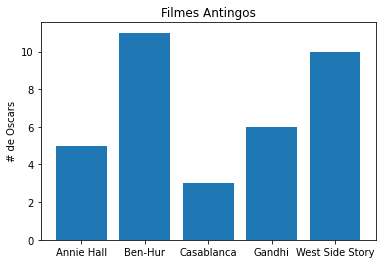

In [8]:
movies = ["Annie Hall", "Ben-Hur", "Casablanca", "Gandhi", "West Side Story"]
num_oscars = [5,11,3,6,10]
xs = [i + 0.1 for i, _ in enumerate(movies)]
plt.bar(xs,num_oscars)
plt.ylabel("# de Oscars")
plt.title("Filmes Antingos")
plt.xticks(xs, movies)
plt.show()

Text(0.5, 1.0, 'Notas da prova 1')

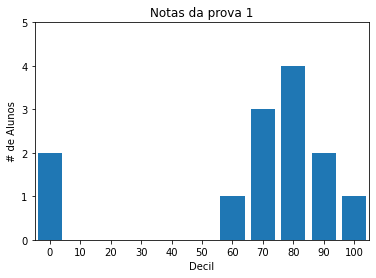

In [19]:
grades = [83,95,91,87,79,0,85,82,100,67,73,77,0]
decile = lambda grade:grade // 10*10
histrogram = Counter(decile(grade) for grade in grades)
plt.bar([x for x in histrogram.keys()], histrogram.values(),8)
plt.axis([-5,105,0,5])
plt.xticks([10*i for i in range(11)])
plt.xlabel("Decil")
plt.ylabel("# de Alunos")
plt.title("Notas da prova 1")